In [70]:
import pandas as pd
import pathlib
import numpy as np
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

REPO_ROOT = pathlib.Path.cwd().parent

# Reading in data
Our data was encoded in `transformation/create_train_test_split.ipynb`

In [71]:
library_train = pd.read_csv(REPO_ROOT / "data/spotify/group/mutually_exclusive_train_test/library_train.csv", index_col=0)
library_test = pd.read_csv(REPO_ROOT / "data/spotify/group/mutually_exclusive_train_test/library_test.csv", index_col=0)

In [72]:
library_train = library_train.drop(columns=["artist", "track"])
library_test = library_test.drop(columns=["artist", "track"])

In [73]:
library_train.head(10)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,...,key_9,key_10,key_11,mode_0,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5,label
uri,,,,,,,,,,,,,,,,,,,,,
4BGZF4oLbTL0pWm7C18pbv,0.413284,0.440223,0.615274,0.030664,0.133805,0.000000,0.080971,0.174273,0.255846,0.301071,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,nick
3WRiWRkolTkYHKqMGsYsOT,0.865929,0.816760,0.717531,0.102934,0.236972,0.000014,0.074001,0.628529,0.335839,0.357607,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,jojo
0CbgB2e5ItzZOA1yZA8Xnt,0.769988,0.557542,0.472926,0.057720,0.185900,0.066146,0.099675,0.003715,0.386092,0.427242,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,nick
3qbqWUDl9j09PeBaQ6CZgr,0.821648,0.650279,0.791823,0.020322,0.142998,0.002406,0.052161,0.637020,0.398865,0.367726,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,richard
0L8LOav65XwLjCLS11gNPD,0.918819,0.577654,0.700455,0.090909,0.076093,0.000000,0.702602,0.525578,0.536536,0.274941,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,nick
5PXyH5bb5fbVfO8LjByhBb,0.531365,0.981006,0.874827,0.212362,0.106226,0.000000,0.371515,0.260242,0.398777,0.303339,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,jojo
0a0TiZm7hjmgyY9i1sWm3Z,0.616236,0.630168,0.748268,0.219577,0.300303,0.000000,0.185641,0.478879,0.194846,0.306315,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,richard
0G2wimhVoDYXbQ6csDxtSf,0.815498,0.241341,0.631311,0.142617,0.305410,0.000000,0.060990,0.304819,0.216429,0.358076,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,nick
2zjGJ0dChMR0KxBZS15aqo,0.879459,0.470391,0.624480,0.046777,0.193050,0.000000,0.085850,0.297389,0.335839,0.264016,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,nick


In [74]:
library_test.head(10)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,...,key_9,key_10,key_11,mode_0,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5,label
uri,,,,,,,,,,,,,,,,,,,,,
5egD7A5x9AHdVO2fMo3Wbo,0.904059,0.481564,0.714363,0.314574,0.030434,0.000000,0.071910,0.132880,0.524828,0.310514,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,nick
5iX1FIxAdb3YoWP846kjvP,0.655597,0.433520,0.499654,0.030784,0.263530,0.000000,0.103160,0.178518,0.266932,0.123825,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,nick
05r1GGg1Rhs0RcUg27C82a,0.559656,0.518436,0.742774,0.143819,0.030843,0.000000,0.263476,0.088304,0.648578,0.410345,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,nick
0JXXNGljqupsJaZsgSbMZV,0.634686,0.562011,0.620867,0.090909,0.027268,0.000320,0.194935,0.494799,0.216843,0.309827,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,richard
7pegxVesMmE2qK0o58xoFG,0.464945,0.406704,0.618887,0.005171,0.156277,0.002677,0.345957,0.407769,0.169005,0.271323,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,jojo
4TuNI3WEMyLQAKRMJmcQdA,0.733087,0.937430,0.822807,0.056157,0.008003,0.108333,0.054252,0.185948,0.523850,0.338387,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,nick
2uww1QnLJtNgP5xXlqfNx0,0.885609,0.814525,0.807167,0.327802,0.147084,0.000000,0.450511,0.840798,0.289086,0.310054,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,jojo
11TpRtA1zMLeAPTLloNmG4,0.210332,0.913966,0.810285,0.645262,0.113376,0.000000,0.067379,0.330291,0.837053,0.288359,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,jojo
3ZbTIbNjbLZtIxk39IRrBQ,0.645756,0.795531,0.696694,0.368687,0.146063,0.001417,0.530669,0.673105,0.347591,0.359795,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,jojo


In [75]:
train_x, train_y = library_train.drop(columns='label'), library_train['label']
test_x, test_y = library_test.drop(columns='label'), library_test['label']

# Training and Hyperparameter Optimization

First Naive Bayes Classifier: [Complement Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#sklearn.naive_bayes.ComplementNB)

In [76]:
hyperparameters = {
	'alpha': np.linspace(0.5, 5, 100),
	'norm': [True, False]
}
complement_bayes = ComplementNB()
complement_bayes_grid = GridSearchCV(complement_bayes, hyperparameters, verbose=2)
complement_bayes_grid.fit(train_x, train_y)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END ...............................alpha=0.5, norm=True; total time=   0.0s
[CV] END ...............................alpha=0.5, norm=True; total time=   0.0s
[CV] END ...............................alpha=0.5, norm=True; total time=   0.0s
[CV] END ...............................alpha=0.5, norm=True; total time=   0.0s
[CV] END ...............................alpha=0.5, norm=True; total time=   0.0s
[CV] END ..............................alpha=0.5, norm=False; total time=   0.0s
[CV] END ..............................alpha=0.5, norm=False; total time=   0.0s
[CV] END ..............................alpha=0.5, norm=False; total time=   0.0s
[CV] END ..............................alpha=0.5, norm=False; total time=   0.0s
[CV] END ..............................alpha=0.5, norm=False; total time=   0.0s
[CV] END ................alpha=0.5454545454545454, norm=True; total time=   0.0s
[CV] END ................alpha=0.545454545454

GridSearchCV(estimator=ComplementNB(),
             param_grid={'alpha': array([0.5       , 0.54545455, 0.59090909, 0.63636364, 0.68181818,
       0.72727273, 0.77272727, 0.81818182, 0.86363636, 0.90909091,
       0.95454545, 1.        , 1.04545455, 1.09090909, 1.13636364,
       1.18181818, 1.22727273, 1.27272727, 1.31818182, 1.36363636,
       1.40909091, 1.45454545, 1.5       , 1.54545455, 1.59090909,
       1.63636364, 1.68181818, 1.72727273...
       3.45454545, 3.5       , 3.54545455, 3.59090909, 3.63636364,
       3.68181818, 3.72727273, 3.77272727, 3.81818182, 3.86363636,
       3.90909091, 3.95454545, 4.        , 4.04545455, 4.09090909,
       4.13636364, 4.18181818, 4.22727273, 4.27272727, 4.31818182,
       4.36363636, 4.40909091, 4.45454545, 4.5       , 4.54545455,
       4.59090909, 4.63636364, 4.68181818, 4.72727273, 4.77272727,
       4.81818182, 4.86363636, 4.90909091, 4.95454545, 5.        ]),
                         'norm': [True, False]},
             verbose=2)

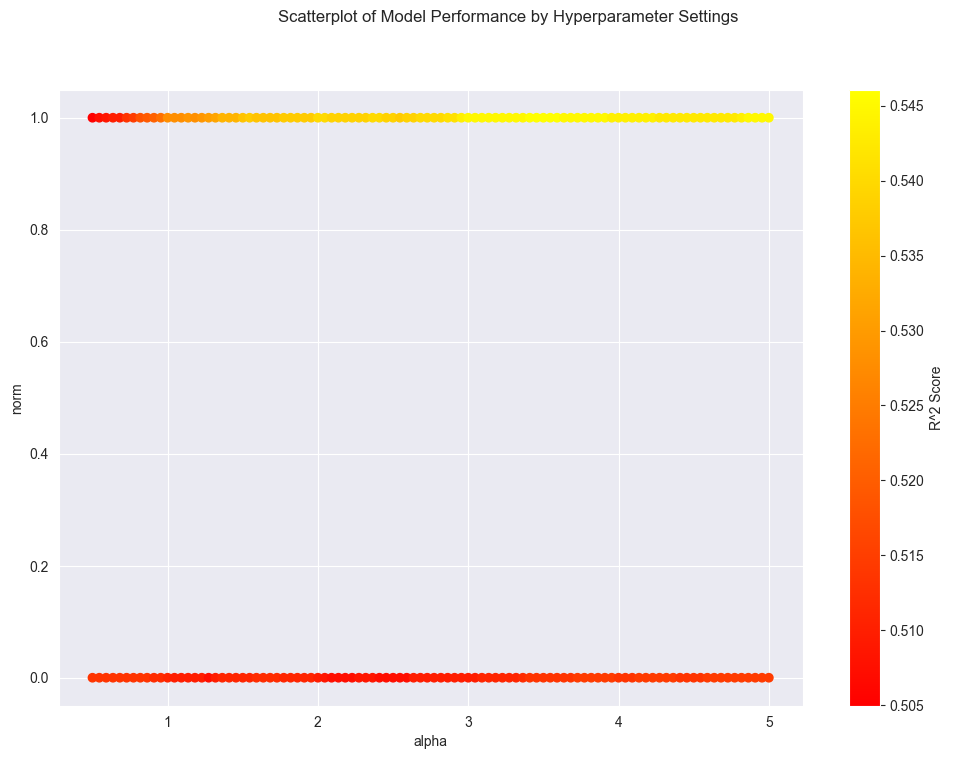

The hyperparameter settings that resulted in the best training accuracy were {'alpha': 3.409090909090909, 'norm': True}, with a R^2 on the training set of 0.55


In [77]:
hyperparam_results = pd.DataFrame(complement_bayes_grid.cv_results_)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
hparam_scatter = ax.scatter(hyperparam_results.param_alpha.values, hyperparam_results.param_norm.values, c=hyperparam_results.mean_test_score, cmap=plt.autumn())
ax.set_xlabel("alpha")
ax.set_ylabel("norm")
cbar = fig.colorbar(hparam_scatter)
cbar.ax.set_ylabel("R^2 Score")
plt.suptitle("Scatterplot of Model Performance by Hyperparameter Settings")
plt.show()
print(f"The hyperparameter settings that resulted in the best training accuracy were {complement_bayes_grid.best_params_}, with a R^2 on the training set of {complement_bayes_grid.best_score_:.2f}")

# Testing

In [78]:
# Create model using best parameters (selected from grid search)
optimized_cnb = ComplementNB(**complement_bayes_grid.best_params_)
optimized_cnb.fit(train_x, train_y)

ComplementNB(alpha=3.409090909090909, norm=True)

In [79]:
# Scoring!
print(f"The Complement Naive Bayes model's prediction of rings has a R^2 of {optimized_cnb.score(test_x, test_y):.2f}")

The Complement Naive Bayes model's prediction of rings has a R^2 of 0.51
